In [2]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n - 1)

In [14]:
%%time
exp(2, 200)

CPU times: user 58 µs, sys: 9 µs, total: 67 µs
Wall time: 72 µs


1606938044258990275541962092341162602522202993782792835301376

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

Matplotlib is building the font cache; this may take a moment.


In [17]:
from timeit import repeat
from numpy import median, percentile

In [19]:
def plot_times(name, xs, n=15):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()

    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e3 * median(sample) for sample in zip(*samples)]

    plt.figure(figsize=(8,8))
    plt.plot(xs, ys)
    plt.xlabel('n')
    plt.ylabel('ms')


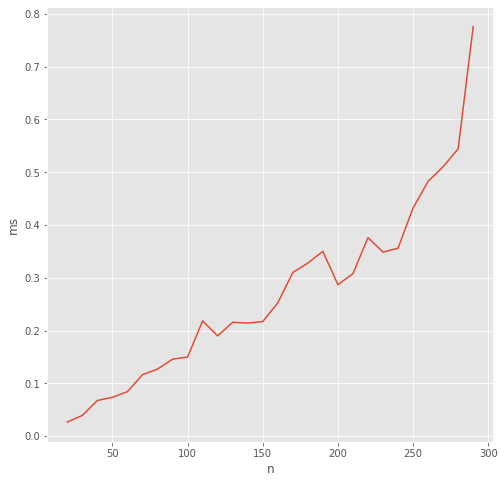

In [23]:
exp_2 = lambda n: exp(2, n)
plot_times('exp_2',  range(20, 300, 10))

In [25]:
def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2:
        return square(exp_fast(b, n // 2))
    else:
        return exp_fast(b, n - 1) * b

In [26]:
square = lambda x: x*x

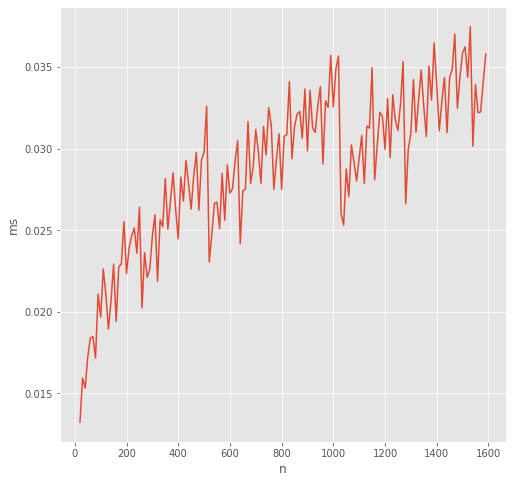

In [29]:
exp_2_fast = lambda n: exp_fast(2, n)
plot_times('exp_2_fast',  range(20, 1600, 10))

In [ ]:
def add(s, v):
    # add v into s, return s
    assert s is not List.empty
    if s.first > v:
        s.first, s.rest = v, Link(s.fist, s.rest)   
        # 直接修改原来的节点值, 然后新建一个节点存储原来的值
    elif s.first < v and empty(s.rest):
        s.rest = Link(v)
    elif s.first < v:
        add(s.rest, v)  # 递归调用, 会回到情况1 or 2
    return s 

In [ ]:
def prune(t, n):
    """ 剪枝 all sub_trees whose lable is n """
    t.branches = [ b for b in t.branches if b.label != n]   # 只留下label不是n的
    for b in t.branches:
        prune(b, n) # 对后面剪枝
